# Apple Jackfruit Dataset

Dataset Credits:
- Fruits Detection > Fruits-Apple-v1
  - https://universe.roboflow.com/ron-xmba6/fruits-detection-hrhn3
- Jackfruit > 2023-04-10 11:58am
  - https://universe.roboflow.com/vietnam-fruit-in-lab/jackfruit-maj1o


 Dataset can be accessed here: https://iitgnacin-my.sharepoint.com/:u:/g/personal/22110103_iitgn_ac_in/ETOx7WAgqltAuhVpPSBEMaYB3ckKLDtF4t0s5Bxd3CLX5A?e=teupL5
## MLP

In [3]:
# import the packages
import numpy as np
import os
import sys
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from matplotlib import pyplot as plt




In [4]:
# Loading the dataset

import zipfile
with zipfile.ZipFile("ApplevsJackfruit.zip","r") as zip_ref:
    zip_ref.extractall("FinalDS")

In [5]:
# Define input shape
input_shape = (640, 640, 3)
target_shape = (224, 224, 3)


## 1 Hidden layer 891 neurons

In [6]:
# mlp model
def mpl_vgg16(target_shape):
    model = Sequential()
    model.add(Flatten(input_shape=target_shape))
    model.add(Dense(900, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

mlp_vgg16_1 = mpl_vgg16(target_shape=target_shape)
mlp_vgg16_1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_vgg16_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 150528)            0         
                                                                 
 dense (Dense)               (None, 900)               135476100 
                                                                 
 dense_1 (Dense)             (None, 1)                 901       
                                                                 
Total params: 135477001 (516.80 MB)
Trainable params: 135477001 (516.80 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [7]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'


# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
history = mlp_vgg16_1.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 4s 60ms/step - loss: 70.8104 - accuracy: 0.7188 - val_loss: 10.0023 - val_accuracy: 0.9250
Epoch 2/5
20/20 [==============================] - 1s 57ms/step - loss: 24.2571 - accuracy: 0.8500 - val_loss: 3.6195 - val_accuracy: 0.9500
Epoch 3/5
20/20 [==============================] - 1s 48ms/step - loss: 10.9892 - accuracy: 0.9125 - val_loss: 52.6689 - val_accuracy: 0.6000
Epoch 4/5
20/20 [==============================] - 1s 48ms/step - loss: 8.4003 - accuracy: 0.9500 - val_loss: 6.4293e-34 - val_accuracy: 1.0000
Epoch 5/5
20/20 [==============================] - 1s 49ms/step - loss: 21.0458 - accuracy: 0.8625 - val_loss: 12.4809 - val_accuracy: 0.8000
Time taken: 10.327001810073853 seconds


Text(0.5, 0, 'Epoch')

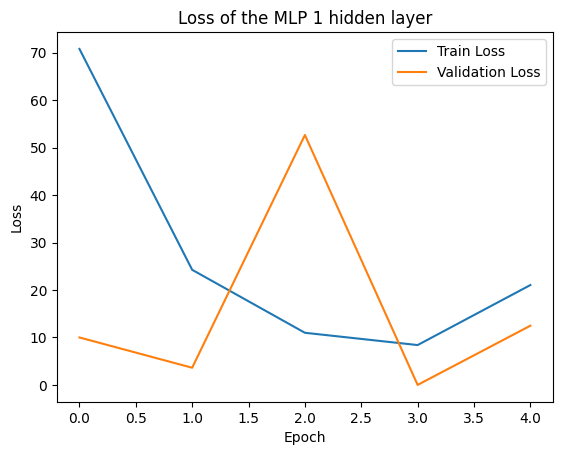

In [8]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the MLP 1 hidden layer')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

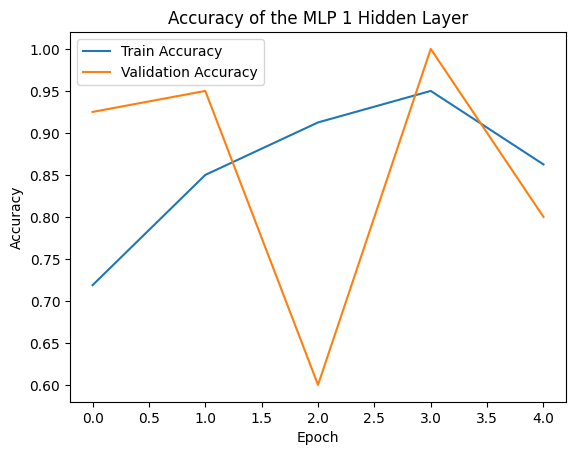

In [9]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the MLP 1 Hidden Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [10]:
print("The Training Loss for the MLP 1 Hidden Layer")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the MLP 1 Hidden Layer")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for MLP 1 Hidden Layer")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for tMLP 1 Hidden Layer")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the MLP 1 Hidden Layer
Epoch 1: 70.81041717529297
Epoch 2: 24.257123947143555
Epoch 3: 10.989221572875977
Epoch 4: 8.400278091430664
Epoch 5: 21.045785903930664
The Validation Loss for the MLP 1 Hidden Layer
Epoch 1: 10.00230598449707
Epoch 2: 3.619527816772461
Epoch 3: 52.668907165527344
Epoch 4: 6.429326862559154e-34
Epoch 5: 12.48085880279541
The Training Accuracy for MLP 1 Hidden Layer
Epoch 1: 0.71875
Epoch 2: 0.8500000238418579
Epoch 3: 0.9125000238418579
Epoch 4: 0.949999988079071
Epoch 5: 0.862500011920929
The Validation Accuracy for tMLP 1 Hidden Layer
Epoch 1: 0.925000011920929
Epoch 2: 0.949999988079071
Epoch 3: 0.6000000238418579
Epoch 4: 1.0
Epoch 5: 0.800000011920929


In [11]:
# Evaluate the model on test data
test_loss, test_accuracy = mlp_vgg16_1.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 28ms/step - loss: 12.4809 - accuracy: 0.8000
Test loss: 12.4809, Test accuracy: 0.8000


## 3 Hiden Layers and

In [12]:
# mlp model
def mpl_vgg16(target_shape):
    model = Sequential()
    model.add(Flatten(input_shape=target_shape))
    model.add(Dense(500, activation='relu'))
    model.add(Dense(9000, activation='relu'))
    model.add(Dense(6053, activation = "relu"))
    model.add(Dense(1, activation='sigmoid'))
    return model

mlp_vgg16_2 = mpl_vgg16(target_shape=target_shape)
mlp_vgg16_2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_vgg16_2.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_2 (Dense)             (None, 500)               75264500  
                                                                 
 dense_3 (Dense)             (None, 9000)              4509000   
                                                                 
 dense_4 (Dense)             (None, 6053)              54483053  
                                                                 
 dense_5 (Dense)             (None, 1)                 6054      
                                                                 
Total params: 134262607 (512.17 MB)
Trainable params: 134262607 (512.17 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
#mpl_vgg16_1.fit(train_generator, steps_per_epoch=8, epochs=10, validation_data=test_generator, validation_steps=8)
history = mlp_vgg16_2.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 3s 61ms/step - loss: 177.2672 - accuracy: 0.6062 - val_loss: 0.6945 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 1s 60ms/step - loss: 0.7549 - accuracy: 0.5500 - val_loss: 2.1530 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 1s 67ms/step - loss: 1.4252 - accuracy: 0.6687 - val_loss: 0.5653 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 1s 52ms/step - loss: 0.7615 - accuracy: 0.5000 - val_loss: 0.6935 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 1s 52ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Time taken: 9.494038343429565 seconds


Text(0.5, 0, 'Epoch')

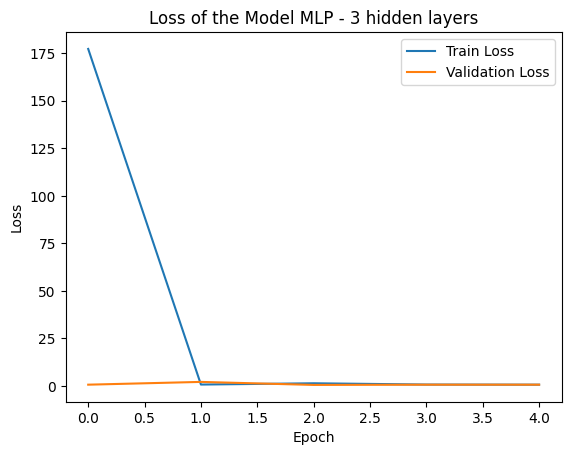

In [14]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model MLP - 3 hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

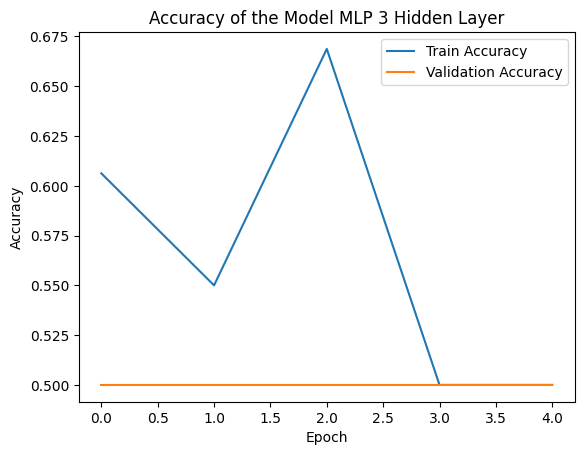

In [15]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model MLP 3 Hidden Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [16]:
print("The Training Loss for the MLP 3 Hidden Layer")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the MLP 3 Hidden Layer")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the MLP 3 Hidden Layer")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the MLP 3 Hidden Layer")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the MLP 3 Hidden Layer
Epoch 1: 177.26719665527344
Epoch 2: 0.7549077868461609
Epoch 3: 1.4251576662063599
Epoch 4: 0.7614759206771851
Epoch 5: 0.6932109594345093
The Validation Loss for the MLP 3 Hidden Layer
Epoch 1: 0.694505512714386
Epoch 2: 2.1530089378356934
Epoch 3: 0.5653063654899597
Epoch 4: 0.6935147047042847
Epoch 5: 0.6931999921798706
The Training Accuracy for the MLP 3 Hidden Layer
Epoch 1: 0.606249988079071
Epoch 2: 0.550000011920929
Epoch 3: 0.668749988079071
Epoch 4: 0.5
Epoch 5: 0.5
The Validation Accuracy for the MLP 3 Hidden Layer
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5


In [17]:
# Evaluate the model on test data
test_loss, test_accuracy = mlp_vgg16_2.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 28ms/step - loss: 0.6932 - accuracy: 0.5000
Test loss: 0.6932, Test accuracy: 0.5000


## 6 Hidden layers

In [18]:
# mlp model
def mpl_vgg16(target_shape):
    model = Sequential()
    model.add(Flatten(input_shape=target_shape))
    model.add(Dense(200, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(9000, activation = "relu"))
    model.add(Dense(9000, activation = "relu"))
    model.add(Dense(1500, activation = "relu"))
    model.add(Dense(300, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    return model

mlp_vgg16_3 = mpl_vgg16(target_shape=target_shape)
mlp_vgg16_3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
mlp_vgg16_3.summary()



Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_6 (Dense)             (None, 200)               30105800  
                                                                 
 dense_7 (Dense)             (None, 1000)              201000    
                                                                 
 dense_8 (Dense)             (None, 9000)              9009000   
                                                                 
 dense_9 (Dense)             (None, 9000)              81009000  
                                                                 
 dense_10 (Dense)            (None, 1500)              13501500  
                                                                 
 dense_11 (Dense)            (None, 300)              

In [19]:
# Start Time
time_start = time.time()

# Set data directories
train_dir = '/content/FinalDS/Dataset/Train'
test_dir = '/content/FinalDS/Dataset/Test'

# Define data generators
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Load training data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Load testing data
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_shape[:2],
    batch_size=8,
    class_mode='binary'
)

# Train the model
#mpl_vgg16_1.fit(train_generator, steps_per_epoch=8, epochs=10, validation_data=test_generator, validation_steps=8)
history = mlp_vgg16_3.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=5,
    validation_data=test_generator,
    validation_steps=len(test_generator)
)


# End Time
time_end = time.time()

# Print time taken
print(f'Time taken: {time_end - time_start} seconds')

Found 160 images belonging to 2 classes.
Found 40 images belonging to 2 classes.
Epoch 1/5
20/20 [==============================] - 4s 63ms/step - loss: 31.4644 - accuracy: 0.5000 - val_loss: 0.6874 - val_accuracy: 0.5000
Epoch 2/5
20/20 [==============================] - 1s 52ms/step - loss: 0.6950 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
20/20 [==============================] - 1s 61ms/step - loss: 0.6959 - accuracy: 0.5000 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 4/5
20/20 [==============================] - 1s 72ms/step - loss: 0.6933 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
20/20 [==============================] - 1s 51ms/step - loss: 0.6931 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Time taken: 10.114254474639893 seconds


Text(0.5, 0, 'Epoch')

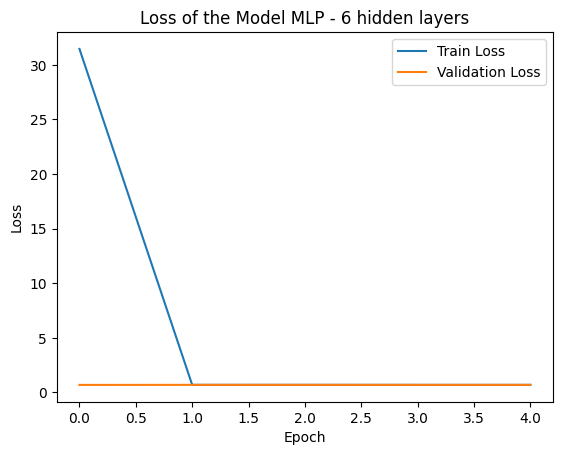

In [20]:
# Plotting the Training and Validation Loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(("Train Loss", "Validation Loss"))
plt.title('Loss of the Model MLP - 6 hidden layers')
plt.ylabel('Loss')
plt.xlabel('Epoch')

Text(0.5, 0, 'Epoch')

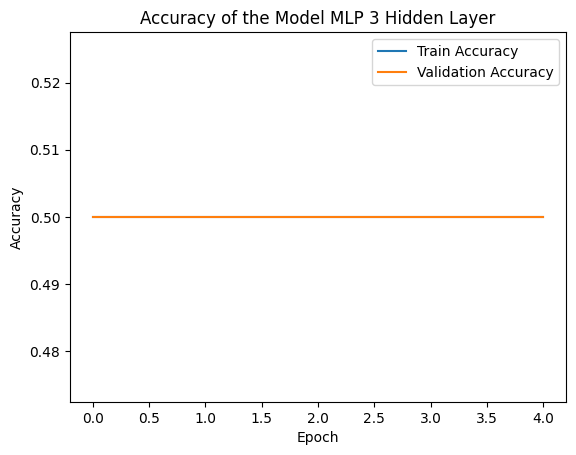

In [21]:
# Plotting the Training and Validation Accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(("Train Accuracy", "Validation Accuracy"))
plt.title('Accuracy of the Model MLP 3 Hidden Layer')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

In [22]:
print("The Training Loss for the MLP 6 Hidden Layer")
for i in range(len(history.history['loss'])):
    print(f"Epoch {i+1}: {history.history['loss'][i]}")

print("The Validation Loss for the MLP 6 Hidden Layer")
for i in range(len(history.history['val_loss'])):
    print(f"Epoch {i+1}: {history.history['val_loss'][i]}")

print("The Training Accuracy for the MLP 6 Hidden Layer")
for i in range(len(history.history['accuracy'])):
    print(f"Epoch {i+1}: {history.history['accuracy'][i]}")

print("The Validation Accuracy for the MLP 6 Hidden Layer")
for i in range(len(history.history['val_accuracy'])):
    print(f"Epoch {i+1}: {history.history['val_accuracy'][i]}")

The Training Loss for the MLP 6 Hidden Layer
Epoch 1: 31.46437644958496
Epoch 2: 0.6950481534004211
Epoch 3: 0.6958729028701782
Epoch 4: 0.6933164000511169
Epoch 5: 0.6930928826332092
The Validation Loss for the MLP 6 Hidden Layer
Epoch 1: 0.6873529553413391
Epoch 2: 0.6932035684585571
Epoch 3: 0.6932947039604187
Epoch 4: 0.6931614875793457
Epoch 5: 0.6931509971618652
The Training Accuracy for the MLP 6 Hidden Layer
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5
The Validation Accuracy for the MLP 6 Hidden Layer
Epoch 1: 0.5
Epoch 2: 0.5
Epoch 3: 0.5
Epoch 4: 0.5
Epoch 5: 0.5


In [23]:
# Evaluate the model on test data
test_loss, test_accuracy = mlp_vgg16_2.evaluate(test_generator, steps=len(test_generator))
print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_accuracy:.4f}")

5/5 [==============================] - 0s 26ms/step - loss: 0.6932 - accuracy: 0.5000
Test loss: 0.6932, Test accuracy: 0.5000
